# Описание проекта

Провести анализ базы вакансий аналитиков данных и data science специалистов, полученных из API HH.ru. Этот проект будет полезен как для кандидатов, которые хотят найти работу в области аналитики данных и Data Science, так и для работодателей, которые ищут квалифицированных специалистов.

# Описание данных

* **id** — уникальный идентификатор вакансии.
* **name** — название вакансии.
* **published_at** — дата публикации вакансии.
* **alternate_url** — альтернативный URL вакансии.
* **type** — тип вакансии (полная занятость, частичная занятость, стажировка и т. д.).
* **employer** — название компании, которая разместила вакансию.
* **department** — название отдела, в который требуется сотрудник.
* **area** — регион, в котором находится компания.
* **experience** — минимальный опыт работы, необходимый для этой должности.
* **key_skills** — ключевые навыки, необходимые для выполнения работы.
* **schedule** — график работы (полный рабочий день, гибкий график и т. п.).
* **employment** — тип занятости (постоянная работа, контракт и т. д.).
* **description** — подробное описание вакансии.
* **description_lemmatized** — описание вакансии после обработки текста (лемматизация, удаление стоп-слов и т. п.).
* **salary_from** — минимальная заработная плата, предлагаемая по вакансии.
* **salary_to** — максимальная заработная плата, предлагаемая по вакансии.
* **salary_bin** — диапазон заработной платы по вакансии.
* **key_skills_from_key_skills_field** — список ключевых навыков, извлечённых из поля «Ключевые навыки».
* **hard_skills_from_description** — список технических навыков, извлечённых из описания вакансии.
* **soft_skills_from_description** — список социальных навыков, извлечённых из описания вакансии.
* **published_date** — дата публикации вакансии.

Описание данных идентично для двух таблиц.

# Цель проекта

Провести анализ рынка вакансий для аналитиков данных и специалистов Data Science, выявить различия в предлагаемых вакансиях.

# План работы

1. Загрузить данные и изучить общую информацию
2. Предобработка данных
3. Исследовательский анализ данных
4. Определение доли грейдов Junior, Junior+, Middle, Senior среди вакансий Аналитик данных и Специалист по Data Science;
5. Определение наиболее желаемых кандидатов на вакансии Аналитик данных и
Специалист по Data Science по следующим параметрам: самые важные hard-skils, самые важные soft-skils. Ответ дать по грейдам Junior, Junior+, Middle, Senior;
6. Определение типичного места работы для Аналитика данных и специалист по Data Science по следующим параметрам: ТОП-работодателей, зарплата, тип занятости, график работы. Ответ дать по грейдам Junior, Junior+, Middle, Senior.
7. Расчитать помесячную динамику количества вакансий для Аналитика данных и специалиста по Data Science. Ответ дать по грейдам Junior, Junior+, Middle, Senior.
8. Сфомировать общий вывод и дать рекомендации
9. Представить результаты исследования в виде презентации

# Установка библиотек и предварительная настройка

In [1]:
#Подключим библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import random

In [2]:
#настроим отображение данных в pandas
pd.set_option('display.max_columns', 50)
pd.set_option('display.float_format', '{:,.2f}'.format)
pd.options.mode.chained_assignment = None

# 1 Загрузка даных и изучение общей информации

Подключим гугл диск и загрузим необходимые файлы с данными для анализа

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
#загрузим данные
data_da, data_ds = (
    pd.read_excel('gdrive/MyDrive/DA-DS_DataFrames/vacancies_da.xlsx'),
    pd.read_excel('gdrive/MyDrive/DA-DS_DataFrames/vacancies_ds.xlsx')
    )

Файлы загружены. Ознакомимся с содержанием датасетов и посмотрим наличие пропусков.

In [5]:
#ознакомимся с датасетом аналитиков данных
data_da.info()
data_da.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                310 non-null    int64         
 1   name                              310 non-null    object        
 2   published_at                      310 non-null    datetime64[ns]
 3   alternate_url                     310 non-null    object        
 4   type                              310 non-null    object        
 5   employer                          310 non-null    object        
 6   department                        92 non-null     object        
 7   area                              310 non-null    object        
 8   experience                        310 non-null    object        
 9   key_skills                        310 non-null    object        
 10  schedule                          310 non-null    

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,82978778,Data analyst,2024-04-09 10:29:02,https://hh.ru/vacancy/82978778,Открытая,Телеком биржа,NaN,Москва,Junior+ (1-3 years),"['HTTP', 'Pandas', 'Linux', 'Git', 'Clickhouse...",Полный день,Полная занятость,"кто мы: servicepipe - команда айтишников, кото...",servicepipe команда айтишник работать рынок иб...,NaN,NaN,ЗП не указана,"SQL, Математическая статистика, Linux, Clickho...",Pandas,NaN
1,85053195,System analyst DWH / Data Analyst,2024-04-08 09:37:50,https://hh.ru/vacancy/85053195,Открытая,Axenix (ранее Accenture),NaN,Краснодар,Junior+ (1-3 years),"['DWH', 'Документация', 'Витрины данных', 'Inf...",Удаленная работа,Полная занятость,компания axenix (ранее accenture) продолжает р...,компания axenix ранее accenture продолжать раб...,NaN,NaN,ЗП не указана,"SQL, DWH, Teradata, Hadoop, Airflow, Greenplum...",NaN,Документация
2,85053196,System analyst DWH / Data Analyst,2024-04-08 09:37:50,https://hh.ru/vacancy/85053196,Открытая,Axenix (ранее Accenture),NaN,Ростов-на-Дону,Junior+ (1-3 years),"['DWH', 'Документация', 'Витрины данных', 'Gre...",Удаленная работа,Полная занятость,компания axenix (ранее accenture) продолжает р...,компания axenix ранее accenture продолжать раб...,NaN,NaN,ЗП не указана,"SQL, DWH, Teradata, Hadoop, Airflow, Greenplum...",NaN,Документация
3,86081569,Data analyst / Аналитик данных,2024-04-27 23:34:50,https://hh.ru/vacancy/86081569,Открытая,IQnergy,NaN,Москва,Middle (3-6 years),"['Pandas', 'Анализ данных']",Полный день,Полная занятость,за последние 2 года мы (iqnergy) выросли в 5 р...,последний 2 год iqnergy вырастать 5 помогать o...,NaN,NaN,ЗП не указана,Анализ данных,Pandas,NaN
4,87407185,"Senior Data Analyst ""Growth""",2024-04-02 17:03:10,https://hh.ru/vacancy/87407185,Открытая,Okko,NaN,Санкт-Петербург,Middle (3-6 years),"['A/B тесты', 'confluence', 'SQL', 'Python']",Полный день,Полная занятость,"обязанности: аналитика привлечения, лояльност...",обязанность аналитика привлечение лояльность о...,NaN,NaN,ЗП не указана,"Python, SQL, A/B тесты",confluence,NaN


В датасете представлено 310 вакансий Аналитиков. В столбцах department, salary_from, salary_to, key_skills_from_key_skills_field, hard_skills_from_description и soft_skills_from_description есть пропуски. Типы данных корректны.

In [6]:
#ознакомимся с датасетом Data Science специалистов
data_ds.info()
data_ds.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                662 non-null    int64         
 1   name                              662 non-null    object        
 2   published_at                      662 non-null    datetime64[ns]
 3   alternate_url                     662 non-null    object        
 4   type                              662 non-null    object        
 5   employer                          662 non-null    object        
 6   department                        270 non-null    object        
 7   area                              662 non-null    object        
 8   experience                        662 non-null    object        
 9   key_skills                        662 non-null    object        
 10  schedule                          662 non-null    

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,67411146,"Ведущий Data Scientist, Ранжирование поиска",2024-04-02 11:20:17,https://hh.ru/vacancy/67411146,Открытая,Ozon,Ozon Информационные технологии,Москва,Middle (3-6 years),"['IT', 'Разработка поисковых технологий', 'dat...",Удаленная работа,Полная занятость,у нас петабайты реальных логов событий пользов...,петабайт реальный лог событие пользователь воз...,NaN,NaN,ЗП не указана,"Python, data science, Разработка поисковых тех...",NaN,NaN
1,78465611,Управляющий директор \ Data Scientist (Сопрово...,2024-04-27 10:10:12,https://hh.ru/vacancy/78465611,Открытая,Банк ВТБ (ПАО),"ПАО ВТБ, Технологический блок",Москва,Middle (3-6 years),"['Оценка рисков', 'Управление рисками', 'MS Po...",Полный день,Полная занятость,наша команда контроля и управления моделями яв...,наш команда контроль управление модель являтьс...,NaN,NaN,ЗП не указана,"Оценка рисков, MS PowerPoint, Статистический а...",NaN,NaN
2,81857265,Associate Professor - Data Science&AI (english),2024-04-08 16:28:05,https://hh.ru/vacancy/81857265,Открытая,Университет Иннополис,NaN,Санкт-Петербург,Middle (3-6 years),"['Machine Learning', 'Public Speaking', 'Writi...",Полный день,Полная занятость,the faculty of computer science and engineerin...,the faculty of computer science and engineerin...,NaN,NaN,ЗП не указана,"Information Technology, Fluent English, Resear...",Юнит-экономика,NaN
3,81857296,Assistant Professor - Data Science&AI (english),2024-04-08 16:28:05,https://hh.ru/vacancy/81857296,Открытая,Университет Иннополис,NaN,Москва,Junior+ (1-3 years),"['Machine Learning', 'Public Speaking', 'Презе...",Полный день,Полная занятость,the faculty of computer science and engineerin...,the faculty of computer science and engineerin...,NaN,NaN,ЗП не указана,"Information Technology, Fluent English, Resear...",Юнит-экономика,Презентация результатов
4,81857358,Assistant Professor - Data Science&AI (english),2024-04-08 16:28:05,https://hh.ru/vacancy/81857358,Открытая,Университет Иннополис,NaN,Санкт-Петербург,Junior+ (1-3 years),"['Machine Learning', 'Public Speaking', 'Презе...",Полный день,Полная занятость,the faculty of computer science and engineerin...,the faculty of computer science and engineerin...,NaN,NaN,ЗП не указана,"Information Technology, Fluent English, Resear...",Юнит-экономика,Презентация результатов


В датасете представлено 662 вакансии Data Scince специалистов. В столбцах department, salary_from, salary_to, key_skills_from_key_skills_field, hard_skills_from_description и soft_skills_from_description есть пропуски. Значения типов данных корректны.

# 2 Предобработка данных

## 2.1 Проверка типов данных

Проверим типы данных в датафрейме и при необходимости заменим на соотвествующие

In [7]:
# проверим типы в датасете вакансий Аналитиков
print('Типы данных датафрейма вакансий Аналитиков \n', data_da.dtypes, '\n')

# проверим типы в датасете вакансий специалистов Data Science
print('Типы данны датафрейма вакансий специалистов DS \n', data_ds.dtypes)

Типы данных датафрейма вакансий Аналитиков 
 id                                           int64
name                                        object
published_at                        datetime64[ns]
alternate_url                               object
type                                        object
employer                                    object
department                                  object
area                                        object
experience                                  object
key_skills                                  object
schedule                                    object
employment                                  object
description                                 object
description_lemmatized                      object
salary_from                                float64
salary_to                                  float64
salary_bin                                  object
key_skills_from_key_skills_field            object
hard_skills_from_description         

**Вывод:** Типы данных полностью соответствуют имеющимся значениям, поэтому нет необходимости их изменять.

Добавим дополнительный столбец с датой добавления вакансии в каждый из датафреймов

In [8]:
data_da['published_date'] = data_da.published_at.dt.date
data_ds['published_date'] = data_ds.published_at.dt.date

## 2.2 Поиск и устранение пропусков

Посмотрим на долю пропусков в датафреймах

In [9]:
print('Доля пропусков в датафрейме вакансий Анатлитиков \n', data_da.isna().mean().sort_values(ascending=False)*100)

Доля пропусков в датафрейме вакансий Анатлитиков 
 salary_to                          91.94
salary_from                        90.97
soft_skills_from_description       72.26
department                         70.32
hard_skills_from_description       63.87
key_skills_from_key_skills_field   39.68
id                                  0.00
employment                          0.00
salary_bin                          0.00
description_lemmatized              0.00
description                         0.00
schedule                            0.00
name                                0.00
key_skills                          0.00
experience                          0.00
area                                0.00
employer                            0.00
type                                0.00
alternate_url                       0.00
published_at                        0.00
published_date                      0.00
dtype: float64


In [10]:
print('Доля пропусков в датафрейме вакансий специалистов DS \n', data_ds.isna().mean().sort_values(ascending=False)*100)

Доля пропусков в датафрейме вакансий специалистов DS 
 salary_from                        91.99
salary_to                          91.54
soft_skills_from_description       70.69
department                         59.21
hard_skills_from_description       53.47
key_skills_from_key_skills_field   46.98
id                                  0.00
employment                          0.00
salary_bin                          0.00
description_lemmatized              0.00
description                         0.00
schedule                            0.00
name                                0.00
key_skills                          0.00
experience                          0.00
area                                0.00
employer                            0.00
type                                0.00
alternate_url                       0.00
published_at                        0.00
published_date                      0.00
dtype: float64


**Вывод:** В обоих датафреймах более 90 % пропусков приходится на поля с информацией о зарплате. Это может быть связано с тем, что некоторые работодатели не указывают точные суммы зарплат, чтобы защитить конфиденциальность своих сотрудников или избежать конкуренции на рынке труда.

Для некоторых позиций, таких как фрилансеры или консультанты, зарплата может варьироваться в зависимости от проекта или клиента, поэтому указание точных сумм менее значимо. В остальных случаях пропуски могли возникнуть по техническим причинам или из-за ошибок сайтов-агрегаторов вакансий.

Замена или удаление пропусков может привести к искажению данных, поэтому такая манипуляция нецелесообразна.

## 2.3 Поиск и удаление дубликатов

Посмотрим на количество уникальных значений в обоих датафреймах

In [11]:
print('Уникальные значения в столбцах датафрейма вакансий Аналитиков \n', data_da.nunique())
print()
print('Уникальные значения в столбцах датафрейма вакансий специалистов DS \n', data_ds.nunique())

Уникальные значения в столбцах датафрейма вакансий Аналитиков 
 id                                  310
name                                176
published_at                        305
alternate_url                       310
type                                  1
employer                            159
department                           15
area                                 19
experience                            4
key_skills                          177
schedule                              4
employment                            2
description                         271
description_lemmatized              268
salary_from                          15
salary_to                            15
salary_bin                            5
key_skills_from_key_skills_field    154
hard_skills_from_description          5
soft_skills_from_description         16
published_date                       49
dtype: int64

Уникальные значения в столбцах датафрейма вакансий специалистов DS 
 id           

Найдем дубликаты по индексам вакансий, поскольку каждой вакансии предоставляется свой уникальный id

In [12]:
print('Дубликатов в датасете вакансий Аналитиков данных ', data_da.duplicated(subset='id').sum())
print()
print('Дубликатов в датасете вакансий специалистов DS ', data_ds.duplicated(subset='id').sum())

Дубликатов в датасете вакансий Аналитиков данных  0

Дубликатов в датасете вакансий специалистов DS  0


Посмотрим есть ли одинаковые вакансии, но с разными ID

In [13]:
dup_data_da = data_da[data_da.duplicated(
        subset=['name', 'published_at', 'employer', 'department', 'area', 'description'],
        keep=False
    )]

dup_data_ds = data_ds[
    data_ds.duplicated(
        subset=['name', 'published_at', 'employer', 'department', 'area', 'description'],
        keep=False
    )]

print('Количество дубликатов вакансий Аналитиков данных с разными ID ', len(dup_data_da))
print('Количество дубликатов вакансий специалистов DS с разными ID ', len(dup_data_ds))

Количество дубликатов вакансий Аналитиков данных с разными ID  0
Количество дубликатов вакансий специалистов DS с разными ID  0


**Вывод:** Поиск дубликатов по ID ничего не обнаружил, также нет дубликатов среди вакансий обоих датафреймов с разынми ID

## 2.4 Проверка количественных значений

Проведем проверку количественных значений на выбросы обоих датафреймов

Text(0.5, 1.0, 'Распределение колич значений DA')

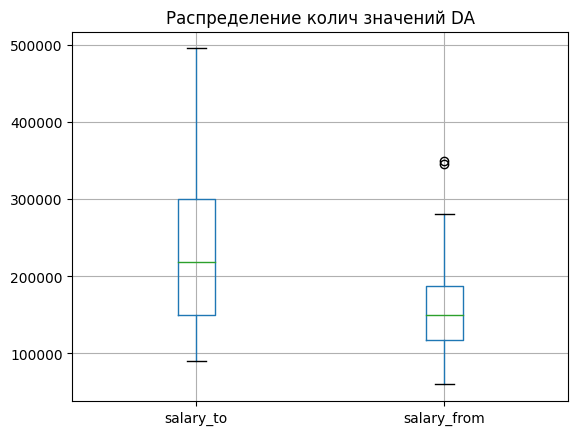

In [14]:
data_da[['salary_to', 'salary_from']].boxplot()
plt.title('Распределение колич значений DA')

Text(0.5, 1.0, 'Распределение колич значений DS')

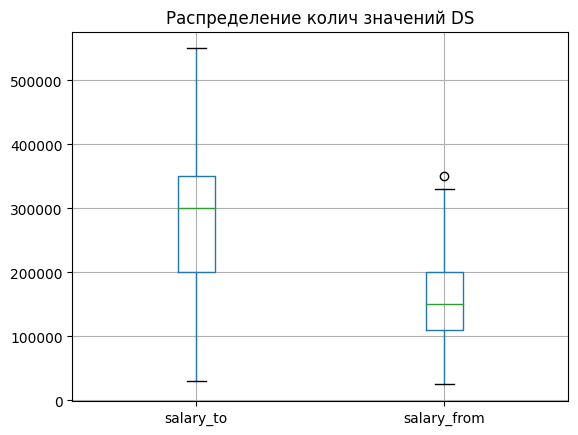

In [15]:
data_ds[['salary_to', 'salary_from']].boxplot()
plt.title('Распределение колич значений DS')

**Вывод:** В обоих датафреймах обнаружены аномальные значения в параметре salary_from. Скорее всего, они появились из-за вакансий на высокооплачиваемые или редкие должности. Это делается для того, чтобы иметь возможность предложить более высокую зарплату.

Убирать выбросы нецелесообразно, потому что это может исказить реальную картину рынка труда. Выбросы представляют собой крайние значения, которые могут значительно отличаться от среднего значения. Убирая их, можно потерять важную информацию о максимальных зарплатах, которые предлагают работодатели, и минимальных зарплатах, на которые соглашаются кандидаты. Это может привести к недооценке или переоценке средней заработной платы в отрасли. Кроме того, выбросы могут быть вызваны различными факторами, такими как уникальные навыки кандидата, опыт работы, местоположение компании и т. д.

Вместо того чтобы убирать выбросы, можно использовать статистические методы для их анализа и интерпретации. Например, можно рассчитать медианную зарплату, которая будет менее чувствительна к выбросам, чем среднее значение. Также можно использовать процентили, чтобы понять, какой процент работников получает зарплату ниже или выше определённого уровня.

## 2.5 Проверка категориальных значений

Проверим наименования вакансий и привидем к единому формату

In [16]:
data_da['name'] = data_da['name'].str.lower()
data_da['name'] = data_da['name'].replace(['аналитик данных/data analyst', 'аналитик данных / data analyst' , 'data analyst / аналитик данных', 'аналитик данных (data analyst)', 'data analyst/аналитик данных'], 'data analyst')
data_da.name.value_counts()

name
data analyst                               102
senior data analyst                         11
junior data analyst                          8
дата аналитик (data scientist)               6
middle data analyst                          6
                                          ... 
data analyst (rtb)                           1
аналитик данных / data analyst (middle)      1
дата аналитик – инженер (dea)                1
sr data analyst / аналитик разработчик       1
qa data analyst                              1
Name: count, Length: 149, dtype: int64

Судя по наименованиям в наборе данных DA есть смежные вакансии на DA и DS. Посмотрим на эти вакансии

In [17]:
mask_da = data_da['name'].str.contains('data scientist')
print('Количество смежных вакансий в датасете с вакансиями DA - ', len(data_da[mask_da]))

data_da[mask_da].head()

Количество смежных вакансий в датасете с вакансиями DA -  16


,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,published_date
17,91765959,дата аналитик (data scientist),2024-04-04 10:10:44,https://hh.ru/vacancy/91765959,Открытая,Центр финансовых технологий,NaN,Санкт-Петербург,Junior+ (1-3 years),['Pandas'],Полный день,Полная занятость,приглашаем в ml команду специалистов в области...,приглашать ml команда специалист область класс...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,2024-04-04
18,91765960,дата аналитик (data scientist),2024-03-28 06:25:29,https://hh.ru/vacancy/91765960,Открытая,Центр финансовых технологий,NaN,Новосибирск,Junior+ (1-3 years),['Pandas'],Полный день,Полная занятость,приглашаем в ml команду специалистов в области...,приглашать ml команда специалист область класс...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,2024-03-28
56,93551149,дата аналитик (data scientist),2024-03-19 05:41:39,https://hh.ru/vacancy/93551149,Открытая,Центр финансовых технологий,NaN,Казань,Junior+ (1-3 years),['Pandas'],Полный день,Полная занятость,приглашаем в ml команду специалистов в области...,приглашать ml команда специалист область класс...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,2024-03-19
74,94241749,дата аналитик (data scientist),2024-03-28 06:25:15,https://hh.ru/vacancy/94241749,Открытая,Центр финансовых технологий,NaN,Томск,Junior+ (1-3 years),['Pandas'],Полный день,Полная занятость,приглашаем в ml команду специалистов в области...,приглашать ml команда специалист область класс...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,2024-03-28
75,94257136,дата аналитик (data scientist),2024-03-28 06:25:25,https://hh.ru/vacancy/94257136,Открытая,Центр финансовых технологий,NaN,Екатеринбург,Junior+ (1-3 years),['Pandas'],Полный день,Полная занятость,приглашаем в ml команду специалистов в области...,приглашать ml команда специалист область класс...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,2024-03-28


Проверим на наличие смежных вакансий датасет DS

In [18]:
data_ds['name'] = data_ds.name.str.lower()
data_ds['name'] = data_ds['name'].replace({'data scientist (nlp)': 'data scientist',  'data scientist (middle)': 'middle data scientist', 'senior data scientist (nlp)': 'senior data scientist', 'middle data science': 'middle data scientist', 'data scientist senior': 'senior data scientist'})
data_ds.name.value_counts()

name
data scientist                                               113
senior data scientist                                         34
middle data scientist                                         23
junior data scientist                                          7
data scientist (middle) с переездом в южно-сахалинск           6
                                                            ... 
data scientist in petroleum engineering                        1
data scientist in geoscience (аналитик данных - геология)      1
middle/senior data scientist nlp/llm                           1
старший эксперт по анализу данных (data science, ml)           1
data scientist в vk рекламу                                    1
Name: count, Length: 359, dtype: int64

In [19]:
mask_ds = data_ds.name.str.contains('data analyst') | data_ds.name.str.contains('аналитик')
print('Количество смежных вакансий в датасете с вакансиями DS - ', len(data_ds[mask_ds]))

data_ds[mask_ds].head()

Количество смежных вакансий в датасете с вакансиями DS -  51


,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,published_date
61,91765959,дата аналитик (data scientist),2024-04-04 10:10:44,https://hh.ru/vacancy/91765959,Открытая,Центр финансовых технологий,NaN,Санкт-Петербург,Junior+ (1-3 years),['Pandas'],Полный день,Полная занятость,приглашаем в ml команду специалистов в области...,приглашать ml команда специалист область класс...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,2024-04-04
62,91765960,дата аналитик (data scientist),2024-03-28 06:25:29,https://hh.ru/vacancy/91765960,Открытая,Центр финансовых технологий,NaN,Новосибирск,Junior+ (1-3 years),['Pandas'],Полный день,Полная занятость,приглашаем в ml команду специалистов в области...,приглашать ml команда специалист область класс...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,2024-03-28
67,92068025,"аналитик данных (data scientist, data engineer)",2024-03-12 12:42:01,https://hh.ru/vacancy/92068025,Открытая,Федеральное государственное автономное учрежде...,NaN,Москва,Middle (3-6 years),"['Документация', 'Создание моделей', 'Оформлен...",Полный день,Полная занятость,в настоящее время фгау «нии «цэпп» расширяет к...,настоящий время фгау нии цэпп расширять команд...,"100,000.00",NaN,ЗП не указана,"Python, Системы автоматического контроля, Созд...",NaN,Документация,2024-03-12
85,92601521,эксперт группа аналитики и моделирования (data...,2024-04-23 17:39:17,https://hh.ru/vacancy/92601521,Открытая,ВТБ Лизинг,NaN,Москва,Junior+ (1-3 years),"['Machine Learning', 'Документация', 'Python',...",Полный день,Полная занятость,"крупнейшая лизинговая компания в россии, являе...",крупный лизинговый компания россия являться ча...,NaN,NaN,ЗП не указана,"Python, Математическое моделирование, Математи...",NaN,Документация,2024-04-23
94,92909300,аналитик data science,2024-03-29 17:40:57,https://hh.ru/vacancy/92909300,Открытая,СК Ренессанс Жизнь,NaN,Москва,Middle (3-6 years),[],Полный день,Полная занятость,"мы компания федерального масштаба, основанная ...",компания федеральный масштаб основывать 2 4 г ...,NaN,NaN,ЗП не указана,NaN,NaN,NaN,2024-03-29


Так как исследование предполагает анализ отдельных вакансий для специалистов DS и DA, то смежные вакансии могут исказить итоговые результаты. Поэтому их следует удалить.

In [20]:
start_size = len(data_da) + len(data_ds)

data_da = data_da[~(mask_da)]
data_ds = data_ds[~(mask_ds)]

print(f'Удалено данных итого - {1 - (len(data_da) + len(data_ds))/start_size:.2%}')

Удалено данных итого - 6.89%


Теперь посмотрим на поле area и оценим какие регионы присутствуют в наборе данных

In [21]:
# смотрим города в наборе вакансий DA
data_da.area.value_counts()

area
Москва                          229
Санкт-Петербург                  36
Екатеринбург                      5
Ростов-на-Дону                    3
Краснодар                         3
Новосибирск                       3
Владивосток                       2
Казань                            2
Самара                            2
Ступино                           1
Нижний Новгород                   1
Тюмень                            1
Пермь                             1
Киров (Кировская область)         1
Ижевск                            1
Воронеж                           1
Калининград                       1
Иваново (Ивановская область)      1
Name: count, dtype: int64

In [22]:
# смотрим города в наборе вакансий DS
data_ds.area.value_counts()

area
Москва             482
Санкт-Петербург     61
Новосибирск         14
Нижний Новгород     13
Екатеринбург         9
Казань               8
Тюмень               3
Краснодар            3
Томск                3
Сочи                 2
Самара               2
Ижевск               2
Воронеж              2
Пермь                1
Южно-Сахалинск       1
Таганрог             1
Калининград          1
Челябинск            1
Ярославль            1
Ростов-на-Дону       1
Name: count, dtype: int64

Больше всего вакансий представлено в Москве и Санкт-Петербурге

Посмотрим на значения поля experience

In [23]:
#смотрим грейды в наборе данных вакансий DA
data_da.experience.value_counts()

experience
Junior+ (1-3 years)      165
Middle (3-6 years)       117
Junior (no experince)      9
Senior (6+ years)          3
Name: count, dtype: int64

In [24]:
#смотрим грейды в наборе данных вакансий DS
data_ds.experience.value_counts()

experience
Middle (3-6 years)       308
Junior+ (1-3 years)      256
Junior (no experince)     25
Senior (6+ years)         22
Name: count, dtype: int64

В наборах данных представлено 4 грейда

Посмотрим на поле employment и определим типы занятости

In [25]:
data_da.employment.value_counts()

employment
Полная занятость       293
Частичная занятость      1
Name: count, dtype: int64

In [26]:
data_ds.employment.value_counts()

employment
Полная занятость       596
Стажировка              12
Проектная работа         2
Частичная занятость      1
Name: count, dtype: int64

Посмотрим поле schedule

In [27]:
data_da.schedule.value_counts()

schedule
Полный день         220
Удаленная работа     63
Гибкий график         7
Сменный график        4
Name: count, dtype: int64

In [28]:
data_ds.schedule.value_counts()

schedule
Полный день         468
Удаленная работа    110
Гибкий график        30
Сменный график        3
Name: count, dtype: int64

И на последок посмотрим на данные в поле employer

In [29]:
data_da.employer.unique()

array(['Телеком биржа', 'Axenix (ранее Accenture)', 'IQnergy', 'Okko',
       'Бланк – банк для бизнеса', '«UZUM TECHNOLOGIES».', 'RUTUBE',
       'ПСБ (ПАО «Промсвязьбанк»)', 'Evercode Lab',
       'Судоходная компания Волжское пароходство', 'Ок Софт', 'МедиаСофт',
       'Центральный банк Российской Федерации', 'WILDBERRIES',
       'МАГНИТ, Розничная сеть', 'Займиго МФК', 'ГКУ Инфогород', 'МТС',
       'СБЕР', 'Joom', 'Сравни', 'Lesta Games', 'StudyWorld',
       'Онлайн-школа Тетрика', 'Go Ahead', 'РЕСО-Гарантия, САО',
       'Финтех Айкью', 'АДВ', 'Марс', 'DNS Технологии', 'Спортмастер',
       'Carely', 'OMD OM Group', 'ЦРТ | Группа компаний', 'Квиллис',
       'Кей Ти Эн Джи Глобал Рус', 'Maxim technology',
       'Лента, федеральная розничная сеть',
       'Национальный исследовательский университет Высшая школа экономики',
       'Garage Eight', 'Кофемания',
       'Группа компаний Стильные Кухни и Интерьеры', 'Талала', 'Devim',
       'Самокат (ООО Умный ритейл)', 'АйТи Тех',

In [30]:
data_ds.employer.unique()

array(['Ozon', 'Банк ВТБ (ПАО)', 'Университет Иннополис',
       'Профи (profi.ru)', 'Совкомбанк', 'Домклик',
       'Специальный Технологический Центр (ООО СТЦ)', 'Газпром нефть',
       'Альфа-Банк', 'Вкусно — и точка', 'Samokat.tech',
       'Филиал в г. Санкт-Петербург АО Концерн Радиостроения Вега',
       'YADRO', 'МТС', 'ОКБ', 'Гудфокаст', 'Faberlic', 'СБЕР',
       'РУСАЛ, Центр подбора персонала', 'Т1', 'ARK', 'TWINO',
       'Спортмастер', 'Rubbles', 'Carcade Leasing', 'БАНК УРАЛСИБ',
       'Группа Гута', 'Еврокаппа', '2ГИС', 'Розничная сеть МТС',
       '1221Системс', 'DM365', 'АТОН', 'Газпромбанк', 'СберОбразование',
       'ВСК, САО', 'ИК СИБИНТЕК', 'РОСБАНК', 'Медиапоинт', 'Яндекс',
       'Lamoda Tech', 'Лаборатория Наносемантика',
       'Трубная Металлургическая Компания', 'Экспобанк',
       'Банк Русский Стандарт', 'СберЛизинг',
       'ФАУ Единый институт пространственного планирования РФ',
       'HeadHunter', 'SL Soft', 'Finstar Financial Group', 'Нетология',
   

С наименованиями работодателей нет ошибок

# 3 Исследовательский анализ данных

Опеделеим период, который представлен в данных

In [31]:
print('Минимальная дата ', data_ds.published_at.dt.date.min())
print('Максимальная дата ', data_da.published_at.dt.date.max())

Минимальная дата  2024-02-29
Максимальная дата  2024-04-30


Посмотрим какое количество вакансий открыто на платформе для аналитиков данных и специалистов DS

In [32]:
print('Открытых вакансий на Аналитика данных - ', data_da.shape[0])
print('Открытых вакансий на специалиста DS - ', data_ds.shape[0])

Открытых вакансий на Аналитика данных -  294
Открытых вакансий на специалиста DS -  611


Вакансий аналитиков в дваза раза меньше, чем вакансий специалиста DS

Определим топ 5 часто встречаемых наименований вакансий обоих направлений

Чтобы решить эту задачу, создадим функцию, которая будет принимать требуемый датафрейм и параметры исследования. На основе этих данных функция сформирует нужный рейтинг и предоставит его с визуализацией

In [33]:
def get_top_vacancy(data, field, top, type, desc):
  top_names = data[field].str.lower().value_counts()[:top]
  fig = px.bar(top_names, title=f'Топ {top} {desc} вакансий {type}')
  fig.update_layout(
          showlegend=False
      )
  fig.show()

In [34]:
get_top_vacancy(data_da, 'name', 5, 'DA', 'наименований')

In [35]:
get_top_vacancy(data_ds, 'name', 5, 'DS', 'наименований')

**Вывод:** Вакансии на аналитика данных чаще именуют data_analyst, затем по популярности идёт добавление уровня грейда. Та же ситуация с DS специалистами — их вакансии чаще публикуют с наименованием data scientist.
Видимо за рассматриваемый период была высокая потребность в DS специалистах с переездом в Южно-Сахалинск.

Определим топ компаний работодателей среди вакансий обоих направлений

In [36]:
get_top_vacancy(data_da, 'employer', 10, 'DA', 'работодателей')

In [37]:
get_top_vacancy(data_ds, 'employer', 10, 'DS', 'работодателей')

**Вывод:** Больше всего вакансий аналитиков публикуют СБЕР, Wildberries, МТС, а специалистов DS — СБЕР, Ozon, Газпромбанк, Samokat.tech.

Выделим топ городов публикаций вакансий на DA и DS

In [38]:
get_top_vacancy(data_da, 'area', 5, 'DA', 'городов')

In [39]:
get_top_vacancy(data_ds, 'area', 5, 'DS', 'городов')

**Вывод:** Одинаково аналитиков и DS специалистов ищут в Москве и Санк-Петербурге.

Определим медианные зарплаты каждого специалиста

In [40]:
#напишем функцию которая будет считать медианные зарплаты и визуализировать их распределение
def show_salary(data, title):
  fig = go.Figure()
  # Use x instead of y argument for horizontal plot
  fig.add_trace(go.Box(x=data['salary_from'],name='Зарплата от'))
  fig.add_trace(go.Box(x=data['salary_to'], name='Зарплата до'))
  fig.update_xaxes(title_text="Уровень заработной платы")
  fig.update_layout(title=f'Распределение уровня зарплат {title}', showlegend=False)
  fig.show()


show_salary(data_da, 'Аналитиков')
show_salary(data_ds, 'DS специалистов')

**Вывод** У аналитиков медианная вилка запрлат такая - от 150 тыс руб до 200 тыс руб. У DS специалистов - от 160 тыс руб. до 300 тыс руб.
Минимальная стартовая зарплата аналитика составляет 60 тыс. рублей, а Data Scientist может рассчитывать на начальный доход в размере 25 тыс. рублей.
При этом максимальная зарплата Data Scientist достигает 550 тыс. рублей, а аналитик может заработать максимум 490 тыс. рублей.

In [41]:
#напишем функцию убирающую ненужные символы в значениях
def remove_brackets(text):
  return text.replace('[', '').replace(']', '');

#напишем функцию возвращающую тип скилла
def get_type(skill):
  if skill in ('документация', 'аналитические исследования', 'аналитическое мышление', 'внимание к деталям', 'презентация результатов', 'коммуникация', 'английский язык', 'сбор и анализ информации', 'проактивность', 'принятие решений', 'решение проблем'):
    return 'soft';
  else:
    return 'hard';

#функция возвращает весь список скиллов
def get_fulllist_skills(data):
  key_skills = data
  key_skills['key_skills'] = key_skills['key_skills'].astype(str).apply(remove_brackets)
  list_skills = ', '.join(map(str, key_skills['key_skills']))

  skills = pd.DataFrame(list_skills.lower().replace("'", '').split(','), columns=['skill'])
  skills.skill = skills.skill.str.strip()
  skills.skill = skills[skills['skill'] != '']
  skills['type'] = skills.skill.map(get_type)

  return skills.dropna();


def show_top_skills(data, type):
  skills_list = pd.DataFrame(get_fulllist_skills(data)['skill'].value_counts())[:50]

  fig = px.bar(skills_list, text='value', orientation='h')
  fig.update_layout(
          showlegend=False,
          title=f'Топ навыков {type}',
          xaxis_title='Частота появления',
          yaxis_title='Навык',
          legend_title=None
      )
  fig.show()


show_top_skills(data_da, 'Аналитика')
show_top_skills(data_ds, 'DS специалиста')

**Вывод:** Аналитикам необходимо улучшать свои навыки в области SQL, Pandas, A/B-тестирования, а также развивать аналитическое мышление и коммуникативные навыки.

Специалистам в области Data Science, напротив, следует сосредоточиться на освоении Python, SQL, машинного обучения (ML), обработки естественного языка (NLP), понимании Confluence и владении математическим аппаратом.

# 4 Определение доли грейдов Junior, Junior+, Middle, Senior среди вакансий Аналитик данных и Специалист по Data Science

Построим функцию, которая посчитает долю каждого грейда по каждому датафрейму и сгруппирует эти данные

In [42]:
def create_pivot(df, index, value, aggfunc, share_name):
  pvt = pd.pivot_table(df, index=index, values=value, aggfunc=aggfunc, dropna=False).reset_index()
  pvt.columns = [index, 'count']
  pvt['sum'] = pvt['count'].sum()
  pvt[share_name] = pvt['count'] / pvt['sum']*100

  return pvt;

Теперь создадим пивот таблицы для вакансий DA и DS, определим % доли и визуализируем полученные доли в рамках каждого грейда для вакансий DA и DS

In [43]:
pvt_da = create_pivot(data_da, 'experience', 'id', 'count', 'Вакансии на Аналитика данных')
pvt_ds = create_pivot(data_ds, 'experience', 'id', 'count', 'Вакансии на специалиста DS')

#объеденим данные двух пивот-таблиц
pvt_merged = pvt_da.merge(pvt_ds, on='experience').round().sort_values(by='Вакансии на Аналитика данных', ascending=False)

#строим визуализацию
fig = px.bar(pvt_merged,
             x='experience',
             y=['Вакансии на Аналитика данных', 'Вакансии на специалиста DS'],
             text='value', barmode='group',
             color_discrete_map={'Вакансии на Аналитика данных': '#FA963E',
                                 'Вакансии на специалиста DS': '#9DC0FA'
                                 }
             )
fig.update_layout(
        showlegend=True,
        title='Доля грейдов вакансий DA и DS, %',
        xaxis_title='Грейд',
        yaxis_title='Доля',
        legend_title=None
    )
fig.show()

**Вывод:** Анализ показал, что в большинстве категорий преобладают вакансии для специалистов DS. Среди вакансий грейда джуниор+ наиболее распространены позиции аналитиков данных. В грейдах миддл и джуниор+ количество предложений превышает число вакансий в категориях синиор и джуниор. Получается чаще работодатели публикуют вакансии на специалистов в области DS уровня  Junior+ или Middle. Больше всего на рынке необходимы аналитики данных уровня Junior+.

# 5 Определение наиболее желаемых кандидатов на вакансии Аналитик данных и Специалист по Data Science по следующим параметрам: самые важные hard-skils, самые важные soft-skils

Сформируем для каждого грейда свой список скиллов и отобразим график по каждому направлению

In [44]:
#функция возвращающая список скиллов
def get_list_skills(data, graid):
  key_skills = data
  if graid:
    key_skills = data[data['experience'] == graid]
  key_skills['key_skills'] = key_skills['key_skills'].astype(str).apply(remove_brackets)
  list_skills = ', '.join(map(str, key_skills['key_skills']))

  skills = pd.DataFrame(list_skills.lower().replace("'", '').split(','), columns=['skill'])
  skills.skill = skills.skill.str.strip()
  skills.skill = skills[skills['skill'] != '']
  skills['type'] = skills.skill.map(get_type)

  return skills.dropna();

#разобъем полученные данные на хард и софт скилы по топ 5 в каждой
def get_soft_hard_skills(data, graid: False, by_type: False, amount):
  all_skills = get_list_skills(data, graid)

  if by_type:
    return (all_skills.query("type == 'soft'").groupby('skill').agg(count=('skill', 'count')).reset_index().sort_values(by='count', ascending=False)[:amount],
            all_skills.query("type == 'hard'").groupby('skill').agg(count=('skill', 'count')).reset_index().sort_values(by='count', ascending=False)[:amount],
            all_skills
            )
  return all_skills.groupby('skill').agg(count=('skill', 'count')).reset_index().sort_values(by='count', ascending=False)[:15]

def count_percentage(data):
  share = data['count'] / data['count'].sum() * 100
  return round(share, 1)

def make_percent(data):
  f = count_percentage(data)
  return f.apply(lambda x: '{:.0f}%'.format(x))

def random_color(x):
  r = random.randint(0, 255)
  g = random.randint(0, 255)
  b = random.randint(0, 255)
  return f'rgb({r}, {g}, {b})'

#функция возвращает получает наборы хард и софт скиллов по каждому направлению и возвращает визуализацию с топ скиллов
def show_top_skills(da, ds, grade):

  #сформируем таблицы по топ скиллам каждого направления
  da_soft, da_hard, skills_da = get_soft_hard_skills(da, grade, True, 15)
  ds_soft, ds_hard, skills_ds = get_soft_hard_skills(ds, grade, True, 15)

  #софрмируем общий перечень скиллов
  list_of_skills = pd.concat([skills_da, skills_ds])
  skills = pd.DataFrame({'skill': list_of_skills['skill'].unique()}).reset_index()
  skills['color'] = skills['index'].apply(random_color)

  def make_color_list(data):
    colors = data.merge(skills, how='inner', on='skill')['color']
    return colors


  #создадим фигуру графика
  fig = make_subplots(
      rows=2, cols=2,
      subplot_titles=('Soft skills Analyst', 'Soft skills DS', 'Hard skills Analyst', 'Hard skills DS')
      )

  fig.add_trace(go.Bar(x=da_soft['skill'], y=count_percentage(da_soft), marker_color=make_color_list(da_soft), text=make_percent(da_soft)),
                row=1, col=1)

  fig.add_trace(go.Bar(x=ds_soft['skill'], y=count_percentage(ds_soft), marker_color=make_color_list(ds_soft), text=make_percent(ds_soft)),
                row=1, col=2)

  fig.add_trace(go.Bar(x=da_hard['skill'], y=count_percentage(da_hard), marker_color=make_color_list(da_hard), text=make_percent(da_hard)),
                row=2, col=1)

  fig.add_trace(go.Bar(x=ds_hard['skill'], y=count_percentage(ds_hard), marker_color=make_color_list(ds_hard), text=make_percent(ds_hard)),
                row=2, col=2)
  fig.update_yaxes(showticklabels=False)
  fig.update_layout(title_text=f'Топ навыков для грейда {grade}', height=1000, width=1500, showlegend=False)

  return fig.show()

#получим список грейдов
graids = np.sort(data_da['experience'].unique())

#для каждого грейда выведем график для вакансий Аналитика данных и специалиста DS
for grade in graids:
  show_top_skills(data_da, data_ds, grade)

**Вывод:** Основные hard skills для аналитиков и специалистов Data Science включают Python и SQL. Работодатели ищут аналитиков Junior, способных аналитически мыслить и общаться, а также специалистов Data Science, умеющих работать с документацией и владеющих английским языком.

Для аналитиков Junior важными hard skills являются SQL, Python, и Pandas. Специалисты Data Science должны владеть Python, Machine Learning, технологиями работы с большими данными и математикой. Навык владения Machine Learning для Junior+ Data Science специалистов находится на четвёртом месте, а на первом месте — Pandas.

Soft skills для аналитиков Junior+ включают владение английским языком, умение проводить аналитические исследования и обладать аналитическим мышлением. Senior аналитики должны также уметь прогнозировать. От специалистов Data Science уровня Senior ожидают умения презентовать результаты и принимать решения. Senior аналитики должны обладать вниманием к деталям.

In [45]:
graids = data_da['experience'].sort_values().unique().tolist()

fig = make_subplots(
    rows=2, cols=4,
    horizontal_spacing = 0.1,
    subplot_titles=['Аналитик ' + grade for grade in graids] + ['Data Scientist ' + grade for grade in graids]
    )

for i, grade in enumerate(graids):
  da_skills = get_soft_hard_skills(data_da, grade, False, 30).sort_values(by='count')
  ds_skills = get_soft_hard_skills(data_ds, grade, False, 30).sort_values(by='count')

  colors = ds_skills.merge(da_skills, on='skill', how='inner')
  colors['color'] = colors['skill'].apply(lambda x: '#FF7E09')

  da_skills['color'] = da_skills['skill'].map(colors.set_index('skill')['color']).fillna('#B5D4FF')
  ds_skills['color'] = ds_skills['skill'].map(colors.set_index('skill')['color']).fillna('#B5D4FF')

  fig.add_trace(go.Bar(x=count_percentage(da_skills), y=da_skills['skill'], marker_color=da_skills['color'], text=make_percent(da_skills), orientation='h'),
                  row=1, col=1+i)

  fig.add_trace(go.Bar(x=count_percentage(ds_skills), y=ds_skills['skill'], marker_color=ds_skills['color'], text=make_percent(ds_skills), orientation='h'),
                  row=2, col=1+i)

  fig.update_layout(title_text='Топ навыков по грейдам', showlegend=False, width=1800, height=900)

fig.show()

**Вывод:** Для DS специалиста топовые навыки такие: Python, pandas, sql, ML. Для аналитика топовые навыки: SQL, Python, Pandas, DA. Если сравнить два направления, то для них общие навыки SQL, Python, Pandas, Big Data, confluence, документация. При этом аналитику важно владеть tableau, знать как проводить a/b тесты, обладать аналитичским мышлением. Для DS специалиста наоборот важнее владеть математическим аппаратом, понимать ML и юнит-экономику, владеть pytorch, nlp.  

# 6 Определение типичного места работы для Аналитика данных и специалист по Data Science по следующим параметрам: ТОП-работодателей, зарплата, тип занятости, график работы

Напишем функцию для визуализации топовых значений по параметру и визуализацией

In [106]:
#функция возвращает рандомный цвет на параметр фрейма
def make_color_list(df, color_list, on):
    colors = df.merge(color_list, how='inner', on=on)['color']
    return colors

#функция возвращающая рейтинг топ значений с визуализацией
def show_top_by_category(main_field, title):
  grades = np.sort(data_da['experience'].unique()).tolist()

  titles = []

  for grade in grades:
    titles.append('Работодатели DA '+ grade)
    titles.append('Работодатели DS '+ grade)

  #получаем список всех значений параметра и каждому присваиваем свой цвет
  colors = pd.DataFrame({main_field: pd.concat([data_ds[main_field], data_da[main_field]]).unique()}).reset_index()
  colors['color'] = colors['index'].apply(random_color)

  fig_empl = make_subplots(
        rows=4, cols=2,
        subplot_titles=titles
        )


  for i, grade in enumerate(grades):
    da_empl = (data_da[data_da['experience'] == grade]
              .groupby(main_field)
              .agg(count=('id', 'count'))
              .reset_index()
              .sort_values(by='count', ascending=False)[:10]
              )
    da_empl['share'] = round(da_empl['count'] / da_empl['count'].sum() * 100, 1)

    ds_empl = (data_ds[data_ds['experience'] == grade]
              .groupby(main_field)
              .agg(count=('id', 'count'))
              .reset_index()
              .sort_values(by='count', ascending=False)[:10]
              )
    ds_empl['share'] = round(ds_empl['count'] / ds_empl['count'].sum() * 100, 1)

    fig_empl.add_trace(go.Bar(
        x=da_empl[main_field],
        y=da_empl['share'],
        marker_color=make_color_list(da_empl, colors, main_field),
        showlegend=False,
        text = da_empl['share'].apply(lambda x: '{:.0f}%'.format(x))),
                row=1+i, col=1)

    fig_empl.add_trace(go.Bar(
        x=ds_empl[main_field],
        y=ds_empl['share'],
        marker_color=make_color_list(ds_empl, colors, main_field),
        showlegend=False,
        text = ds_empl['share'].apply(lambda x: '{:.0f}%'.format(x))
        ),
                row=1+i, col=2)

  fig_empl.update_yaxes(showticklabels=False)
  fig_empl.update_layout(title_text=title, height=1200, width=1500, showlegend=False,
                        xaxis=dict(tickfont=dict(size=9)),
                        xaxis2=dict(tickfont=dict(size=9)),
                        xaxis3=dict(tickfont=dict(size=9)),
                        xaxis4=dict(tickfont=dict(size=9)),
                        xaxis5=dict(tickfont=dict(size=9)),
                        xaxis6=dict(tickfont=dict(size=9)),
                        xaxis7=dict(tickfont=dict(size=9)),
                        xaxis8=dict(tickfont=dict(size=9)))

  fig_empl.show()

In [111]:
#напишем функцию для визуализации топовых значений и их отображения в двух фреймах
def show_top_by_field(main_field, title):
  titles = []

  for grade in grades:
    titles.append('Работодатели DA '+ grade)
    titles.append('Работодатели DS '+ grade)


  fig_empl = make_subplots(
        rows=4, cols=2,
        subplot_titles=titles
        )

  for i, grade in enumerate(grades):
    da_employer = data_da[data_da['experience'] == grade].groupby(main_field).agg(count=('id', 'count')).reset_index().sort_values(by='count', ascending=False)
    ds_employer = data_ds[data_ds['experience'] == grade].groupby(main_field).agg(count=('id', 'count')).reset_index().sort_values(by='count', ascending=False)

    da_employer['share'] = round(da_employer['count'] / da_employer['count'].sum() * 100, 1)
    ds_employer['share'] = round(ds_employer['count'] / ds_employer['count'].sum() * 100, 1)

    colors = pd.DataFrame({main_field: da_employer[:10].merge(ds_employer[:10], on=main_field, how='inner')[main_field].unique()})
    colors['color'] = '#FF7E09'

    da_employer['color'] = da_employer[main_field].map(colors.set_index(main_field)['color']).fillna('#B5D4FF')
    ds_employer['color'] = ds_employer[main_field].map(colors.set_index(main_field)['color']).fillna('#B5D4FF')

    fig_empl.add_trace(go.Bar(
          x=da_employer[main_field][:10],
          y=da_employer['share'],
          marker_color=da_employer['color'],
          showlegend=False,
          text = da_employer['share'].apply(lambda x: '{:.0f}%'.format(x))),
                      row=1+i, col=1)

    fig_empl.add_trace(go.Bar(
          x=ds_employer[main_field][:10],
          y=ds_employer['share'],
          marker_color=ds_employer['color'],
          showlegend=False,
          text = ds_employer['share'].apply(lambda x: '{:.0f}%'.format(x))),
                      row=1+i, col=2)

  fig_empl.update_yaxes(showticklabels=False)
  fig_empl.update_layout(title_text=title, height=1200, width=1500, showlegend=False,
                          xaxis=dict(tickfont=dict(size=9)),
                          xaxis2=dict(tickfont=dict(size=9)),
                          xaxis3=dict(tickfont=dict(size=9)),
                          xaxis4=dict(tickfont=dict(size=9)),
                          xaxis5=dict(tickfont=dict(size=9)),
                          xaxis6=dict(tickfont=dict(size=9)),
                          xaxis7=dict(tickfont=dict(size=9)),
                          xaxis8=dict(tickfont=dict(size=9)))
  fig_empl.show()

Выделем топ 10 работодателей по количеству вакансий на Аналитика данных и специалиста DS по каждому грейду

In [112]:
show_top_by_field('employer', 'Топ 10 работодателей')

Посмотрим на общее количество работодателей по открытым вакансиям на DA и DS

In [49]:
all_da_empl = data_da.groupby('employer').agg(count=('id', 'count')).reset_index().sort_values(by='count', ascending=False)[:10]
all_da_empl['share'] = count_percentage(all_da_empl)
all_ds_empl = data_ds.groupby('employer').agg(count=('id', 'count')).reset_index().sort_values(by='count', ascending=False)[:10]
all_ds_empl['share'] = count_percentage(all_ds_empl)

fig_all_empl = make_subplots(
      rows=1, cols=2,
      subplot_titles=['Работодатели Аналитиков', 'Работодатели специалистов DS']
      )

fig_all_empl.add_trace(go.Bar(
    x=all_da_empl['employer'],
    y=all_da_empl['share'],
    marker_color='blue',
    showlegend=False,
    text=make_percent(all_da_empl)),
                   row=1, col=1)

fig_all_empl.add_trace(go.Bar(
    x=all_ds_empl['employer'],
    y=all_ds_empl['share'],
    marker_color='red',
    showlegend=False,
    text=make_percent(all_ds_empl)
    ),
                   row=1, col=2)

fig_all_empl.update_layout(title_text='Топ работодателей среди вакансий Аналитиков и специалистов DS ', showlegend=False)
fig_all_empl.show()

**Вывод:** Сбербанк наиболее активно нанимает специалистов обоих направлений — на него приходится более половины всех вакансий. За ним следует Wildberries, который активно ищет аналитиков. Ozon занимает второе место по поиску Data Scientist.
Если рассматривать сферу деятельности компаний, которые ищут аналитиков и Data Scientist, то чаще всего таких сотрудников ищут банки и компании электронной коммерции. Также есть вакансии от маркетплейсов, например, Lamoda и Ozon.

СБЕР активно ищет аналитиков Junior+ и Middle, а вот DS специалистов готов нанимать менее опытных Junior, а также Senior уровня.  

Теперь определим по грейдам наиболее частые диапазоны ЗП Аналитиков и специалистов DS

In [118]:
show_top_by_category('salary_bin', 'Топ зарплатных категорий')

**Вывод:** Во всех грейдах наблюдается общая тенденция: работодатели часто не указывают размер заработной платы. Это может быть связано с тем, что работодатель хочет сначала оценить уровень квалификации кандидата и его зарплатные ожидания, прежде чем сделать конкретное предложение. Или же зарплата может варьироваться в зависимости от опыта и навыков кандидата.

Например, работодатель может предложить большую зарплату профессионалу с опытом и меньшую — новичку, которого нужно обучать.

Так, в грейдах аналитиков Senior и Junior зарплаты не указаны, чаще указываются диапазоны зарплат в грейде Middle обоих направлений. Однако 5 % работодателей готовы предложить соискателю уровня Junior на позицию DS-специалиста зарплату более 300 тысяч рублей, а порог предложения аналитикам достигает диапазона от 200 до 300 тысяч рублей.

Больше вакансий среди специалистов DS Senior с зарплатой более 300 тысяч, чем вакансий с зарплатой от 100 до 200 тысяч.

Проанализируем распределение типов занятости по грейдам

In [126]:
show_top_by_category('employment', 'Типы занятости по грейдам')

**Вывод:** Аналитикjd и специалистjd в области Data Science чаще ищут на условия полной занятости. Однако существуют вакансии, где ищут младших специалистов Data Science на стажировку, что составляет 48%.

Проанализируем графики работы по каждому грейду

In [122]:
show_top_by_category('schedule', 'График работы по грейдам')

**Вывод:** Более 70 % вакансий каждого грейда аналитиков данных и специалистов Data Science предполагают работу на полный рабочий день.

Младших аналитиков данных ищут либо на полный день (89 %), либо на сменный график (11 %). Специалистов уровня Senior ищут на полный день или для удалённой работы. Больше предложений удалённой работы доступно для грейдов Junior+ и Middle.

Специалисты Data Science уровня Senior могут найти работу с гибким или сменным графиком, в отличие от аналитиков такого же уровня.

# 7 Расчитать помесячную динамику количества вакансий для Аналитика данных и специалиста по Data Science

Посмотрим на ежедневную динамику публикации вакансий для каждого грейда

In [53]:
grades = np.sort(data_da['experience'].unique()).tolist()

for grade in grades:

  dynamic_da = data_da[data_da['experience'] == grade].pivot_table(index='published_date', values='id', aggfunc='count').reset_index()
  dynamic_da.columns = ['Дата', 'Вакансии DA']

  dynamic_ds = data_ds[data_ds['experience'] == grade].pivot_table(index='published_date', values='id', aggfunc='count').reset_index()
  dynamic_ds.columns = ['Дата', 'Вакансии DS']

  dynamic_data = dynamic_ds.merge(dynamic_da, on='Дата', how='outer').fillna(0).sort_values('Дата')

  fig = px.line(dynamic_data, x='Дата', y=['Вакансии DA', 'Вакансии DS'], title=f'Ежедневная динамика публикации вакансий {grade}', markers=True)
  fig.update_layout(
    yaxis={'title': 'Количество вакансий'},
    legend_title_text = ''
    )
  fig.show()

**Вывод:** В целом, вакансий на аналитиков данных и специалистов Data Science уровня Junior+ или Middle больше, чем вакансий других уровней. Это может быть связано с тем, что компании предпочитают нанимать специалистов с опытом работы от 1 года до 4 лет, так как они уже обладают необходимыми навыками и знаниями, но всё ещё открыты для обучения и развития.

Вакансии для специалистов уровня Senior обычно предъявляют высокие требования к опыту работы и навыкам. Это может отпугивать кандидатов, которые не соответствуют этим требованиям. Поэтому компании, ищущие специалистов уровня Senior, чаще обращаются к другим каналам привлечения, нежели к агрегаторам вакансий, таким как HH.ru.

Также наблюдается явный тренд: в начале месяца публикуется больше вакансий, чем в конце. Однако в течение рассматриваемого периода динамика публикаций разнонаправлена. Бывают дни, когда резко возрастает объём публикации вакансий. Скорее всего, это связано с планами найма компаний-работодателей.

# 8 Итоговые выводы

На основе проведённого анализа можно сделать следующие выводы:

Существует высокая потребность в специалистах Data Science, особенно в категории Middle. Это может быть связано с тем, что компании стремятся развивать направление Data Science и привлекать молодых специалистов, которые обладают необходимыми навыками и знаниями.

Среди Аналитиков работодатели чаще ищут специалистов уровня Junior+.

Основные hard skills для аналитиков и специалистов Data Science включают Python и SQL. Эти языки программирования являются ключевыми для работы с данными и анализа информации. Также важны навыки работы с базами данных и знание алгоритмов машинного обучения.

Soft skills для аналитиков Junior+ включают владение английским языком, умение проводить аналитические исследования и обладать аналитическим мышлением. Это важно для понимания задач и проблем, а также для поиска решений.

Сбербанк является лидером по найму специалистов обоих направлений. Это может быть связано с тем, что Сбербанк активно развивает цифровые технологии и нуждается в квалифицированных кадрах.
Wildberries активно ищет аналитиков, а Ozon занимает второе место по поиску Data Scientist. Это может быть связано с тем, что эти компании являются крупными игроками на рынке электронной коммерции и нуждаются в специалистах, которые могут анализировать данные о продажах, поведении покупателей и эффективности рекламных кампаний.

Банки и компании электронной коммерции чаще всего ищут таких сотрудников. Это может быть связано с тем, что эти отрасли активно используют данные для принятия решений и оптимизации бизнес-процессов.

Зарплаты часто не указаны, особенно для аналитиков Senior и Junior. Это может быть связано с тем, что компании хотят сначала оценить уровень квалификации кандидата и его зарплатные ожидания, прежде чем сделать конкретное предложение. Однако есть предложения свыше 300 тысяч рублей для специалистов Data Science уровня Junior+. Это говорит о том, что компании готовы платить высокую зарплату молодым специалистам, которые обладают необходимыми навыками и знаниями.
Более 70 % вакансий каждого грейда предполагают работу на полный рабочий день. Это говорит о том, что большинство компаний предпочитает нанимать сотрудников на полную ставку. Однако есть предложения удалённой работы и работы на сменный график.

В целом, рынок труда для аналитиков данных и специалистов Data Science является активным и перспективным. Компании ищут молодых специалистов, которые обладают необходимыми навыками и знаниями. Зарплаты могут быть высокими, особенно для специалистов уровня Junior+.